In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("CREMP_SCOR_Summaries_2023_Counts.csv")

In [5]:
data.head()

,Year,Date,Subregion,Habitat,SiteID,Site_name,StationID,Acropora_cervicornis,Acropora_palmata,Acropora_prolifera,...,Pseudodiploria_strigosa,Scleractinia,Scolymia_cubensis,Scolymia_lacera,Siderastrea_radians,Siderastrea_siderea,Solenastrea_bournoni,Solenastrea_hyades,Stephanocoenia_intersepta,Undaria_agaricites_complex
0,2011,5/14/2011,LK,BCP,18,Content Keys,181,0,0,0,...,0,0,0,0,0,4,0,0,0,0
1,2011,5/14/2011,LK,BCP,18,Content Keys,182,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,2011,5/14/2011,LK,BCP,18,Content Keys,183,0,0,0,...,0,0,0,0,0,5,0,0,0,0
3,2011,5/14/2011,LK,BCP,18,Content Keys,184,0,0,0,...,0,0,0,0,1,6,0,0,0,0
4,2011,6/6/2011,UK,P,21,Two Patches,211,0,0,0,...,0,0,0,0,0,14,2,0,1,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2037 entries, 0 to 2036
Data columns (total 57 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         2037 non-null   int64  
 1   Date                         2037 non-null   object 
 2   Subregion                    2037 non-null   object 
 3   Habitat                      2037 non-null   object 
 4   SiteID                       2037 non-null   int64  
 5   Site_name                    2037 non-null   object 
 6   StationID                    2037 non-null   int64  
 7   Acropora_cervicornis         2037 non-null   int64  
 8   Acropora_palmata             2037 non-null   int64  
 9   Acropora_prolifera           2037 non-null   int64  
 10  Agaricia_fragilis            2037 non-null   int64  
 11  Agaricia_lamarcki            2037 non-null   int64  
 12  Cladocor_arbuscula           2037 non-null   int64  
 13  Colpophyllia_natan

In [15]:
#🔍 1. Basic EDA / Data Cleaning

# Convert 'Date' to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Extract basic stats
data.describe()

,Year,Date,SiteID,StationID,Acropora_cervicornis,Acropora_palmata,Acropora_prolifera,Agaricia_fragilis,Agaricia_lamarcki,Cladocor_arbuscula,...,Pseudodiploria_strigosa,Scleractinia,Scolymia_cubensis,Scolymia_lacera,Siderastrea_radians,Siderastrea_siderea,Solenastrea_bournoni,Solenastrea_hyades,Stephanocoenia_intersepta,Undaria_agaricites_complex
count,2037.000000,2037,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,...,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000
mean,2017.088365,2017-08-06 03:57:31.546391808,50.901816,511.500245,0.109475,0.054001,0.000982,0.236622,0.066274,0.231713,...,0.268041,0.001964,0.038292,0.000491,0.483554,23.105547,0.144821,0.005891,9.137457,6.277369
min,2011.000000,2011-05-10 00:00:00,18.000000,181.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2014.000000,2014-07-23 00:00:00,34.000000,343.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000
50%,2017.000000,2017-08-15 00:00:00,53.000000,532.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,3.000000,3.000000
75%,2020.000000,2020-09-20 00:00:00,72.000000,721.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.000000,0.000000,13.000000,9.000000
max,2023.000000,2023-09-13 00:00:00,81.000000,814.000000,18.000000,10.000000,2.000000,15.000000,8.000000,24.000000,...,6.000000,1.000000,3.000000,1.000000,12.000000,138.000000,5.000000,2.000000,79.000000,45.000000
std,3.720337,NaN,19.479504,194.825257,0.723785,0.502479,0.044313,0.914291,0.387712,1.463141,...,0.623559,0.044281,0.204340,0.022157,1.198947,21.693348,0.481626,0.093841,13.070038,8.183201


In [13]:
data.isna().sum()

Year                             0
Date                             0
Subregion                        0
Habitat                          0
SiteID                           0
Site_name                        0
StationID                        0
Acropora_cervicornis             0
Acropora_palmata                 0
Acropora_prolifera               0
Agaricia_fragilis                0
Agaricia_lamarcki                0
Cladocor_arbuscula               0
Colpophyllia_natans              0
Dendrogyra_cylindrus             0
Dichocoenia_stokesii             0
Diploria_labyrinthiformis        0
Eusmilia_fastigiata              0
Favia_fragum                     0
Helioseris_cucullata             0
Isophyllia_rigida                0
Isophyllia_sinuosa               0
Madracis_aurentenra              0
Madracis_decactis                0
Madracis_pharensis               0
Madracis_scenaria                0
Madracis_sp                      0
Manicina_areolata                0
Meandrina_meandrites

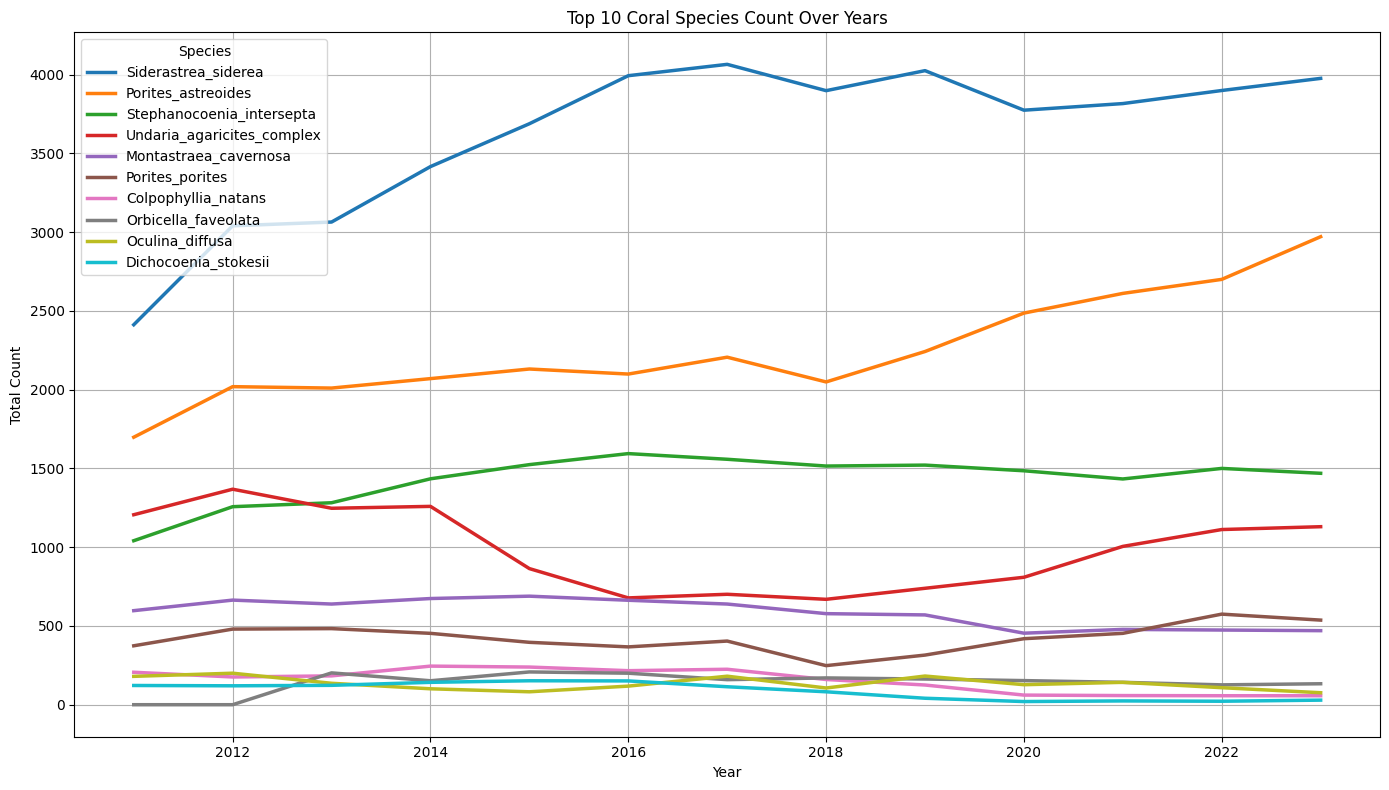

In [17]:
# 📈 2. Total Species Observations by Year

species_cols = data.columns[7:]  # All species columns
yearly_species = data.groupby('Year')[species_cols].sum()

# Plot total coral counts per year (top 10 species)
top_species = yearly_species.sum().sort_values(ascending=False).head(10).index
yearly_species[top_species].plot(figsize=(14, 8), linewidth=2.5)
plt.title("Top 10 Coral Species Count Over Years")
plt.ylabel("Total Count")
plt.xlabel("Year")
plt.legend(title='Species')
plt.grid(True)
plt.tight_layout()
plt.show()

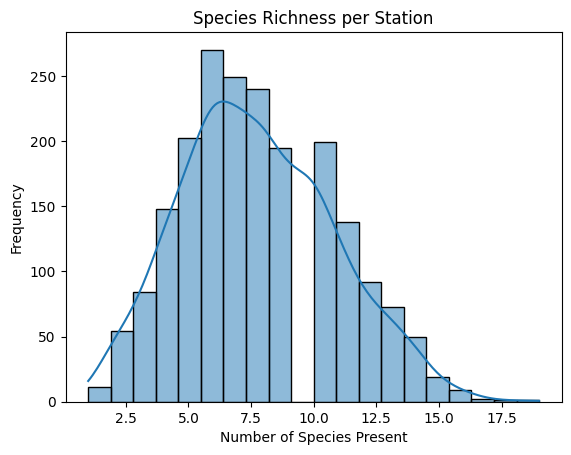

In [19]:
# 🧬 3. Species Richness per Site

# Count number of species present (>0) per StationID
data['Species_Richness'] = data[species_cols].gt(0).sum(axis=1)

# Plot richness distribution
sns.histplot(data['Species_Richness'], bins=20, kde=True)
plt.title("Species Richness per Station")
plt.xlabel("Number of Species Present")
plt.ylabel("Frequency")
plt.show()

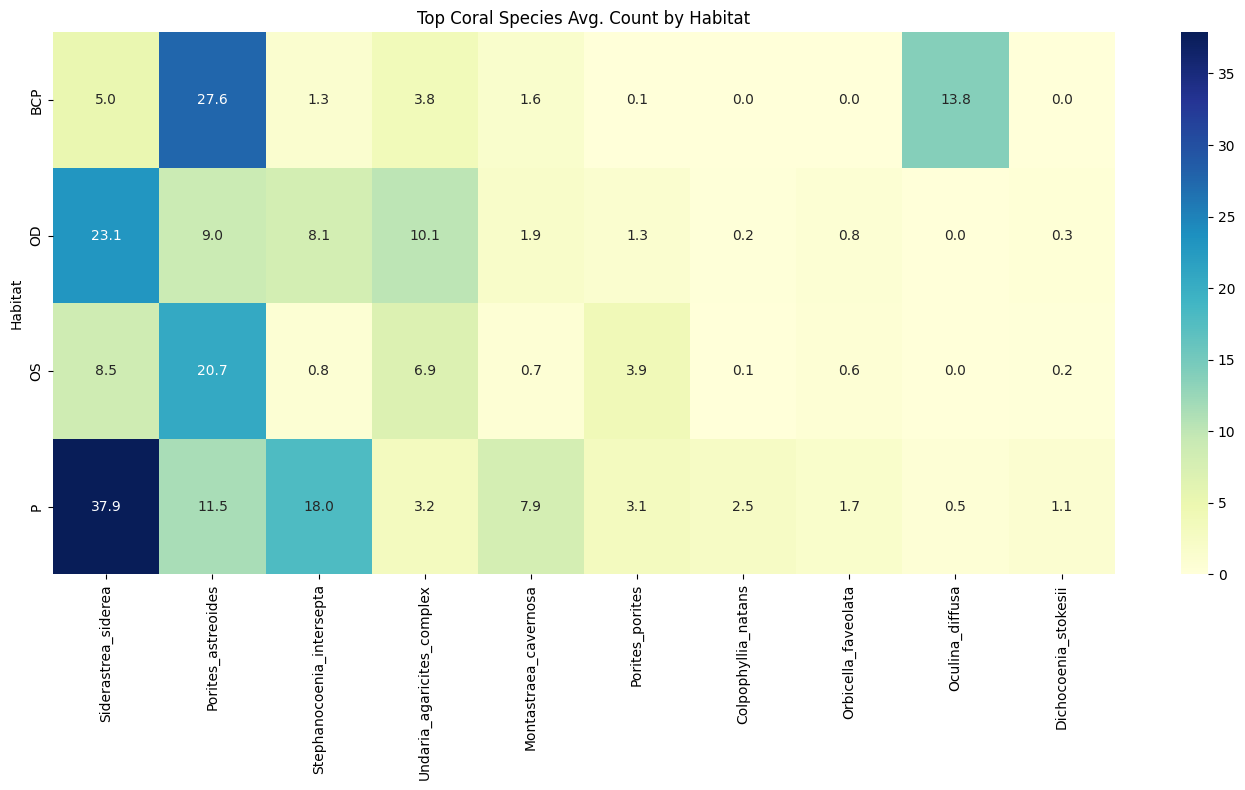

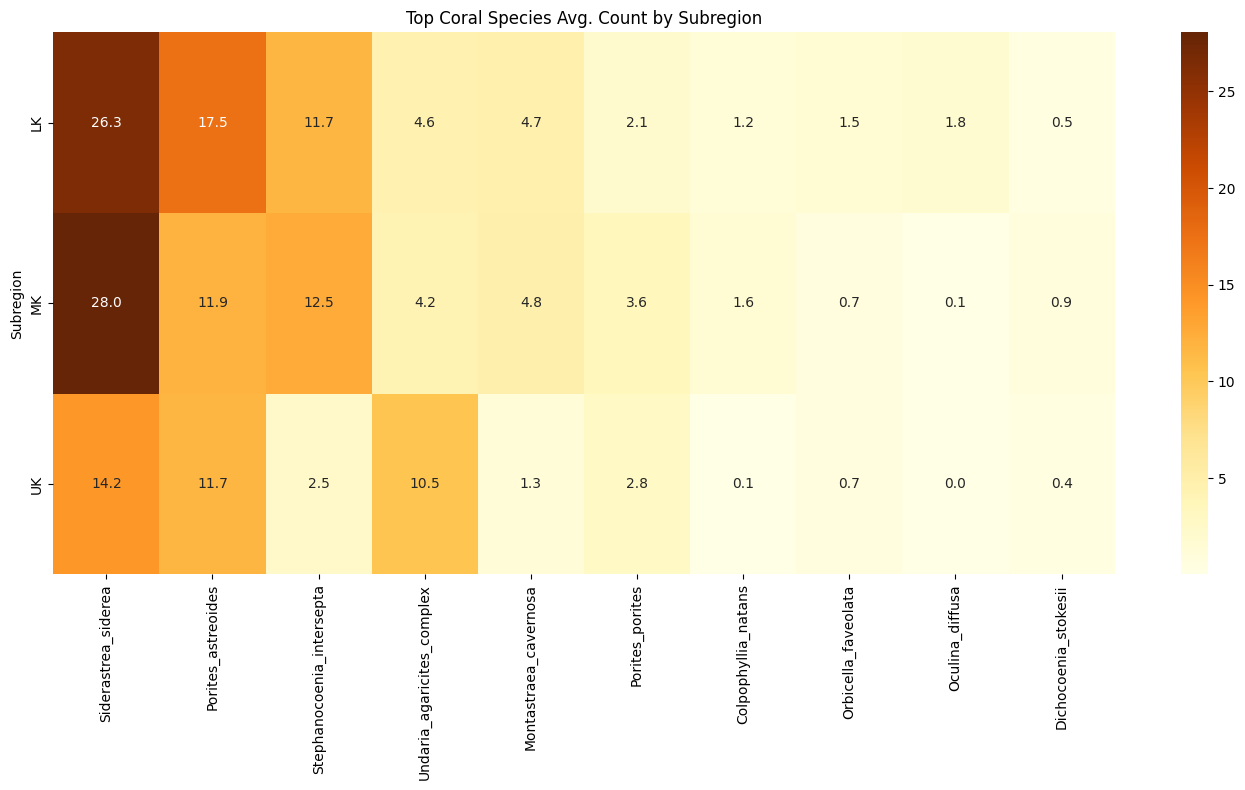

In [21]:
# 🌎 4. Habitat and Subregion Heatmaps

# Average counts by Habitat
habitat_avg = data.groupby('Habitat')[species_cols].mean()
plt.figure(figsize=(14, 8))
sns.heatmap(habitat_avg[top_species], cmap="YlGnBu", annot=True, fmt=".1f")
plt.title("Top Coral Species Avg. Count by Habitat")
plt.tight_layout()
plt.show()

# Same for Subregion
subregion_avg = data.groupby('Subregion')[species_cols].mean()
plt.figure(figsize=(14, 8))
sns.heatmap(subregion_avg[top_species], cmap="YlOrBr", annot=True, fmt=".1f")
plt.title("Top Coral Species Avg. Count by Subregion")
plt.tight_layout()
plt.show()


In [23]:
# 🧭 5. Species-Level Summary

species_summary = pd.DataFrame({
    'Total_Count': data[species_cols].sum(),
    'Mean_Per_Station': data[species_cols].mean(),
    'Presence_Stations': data[species_cols].gt(0).sum()
}).sort_values(by='Total_Count', ascending=False)

species_summary.head(10)

,Total_Count,Mean_Per_Station,Presence_Stations
Siderastrea_siderea,47066.0,23.105547,1964
Porites_astreoides,29292.0,14.379971,1875
Stephanocoenia_intersepta,18613.0,9.137457,1495
Undaria_agaricites_complex,12787.0,6.277369,1496
Montastraea_cavernosa,7589.0,3.725577,1267
Porites_porites,5504.0,2.702013,1148
Colpophyllia_natans,2008.0,0.985763,525
Orbicella_faveolata,1808.0,1.038484,739
Oculina_diffusa,1739.0,0.853706,152
Dichocoenia_stokesii,1142.0,0.560628,569


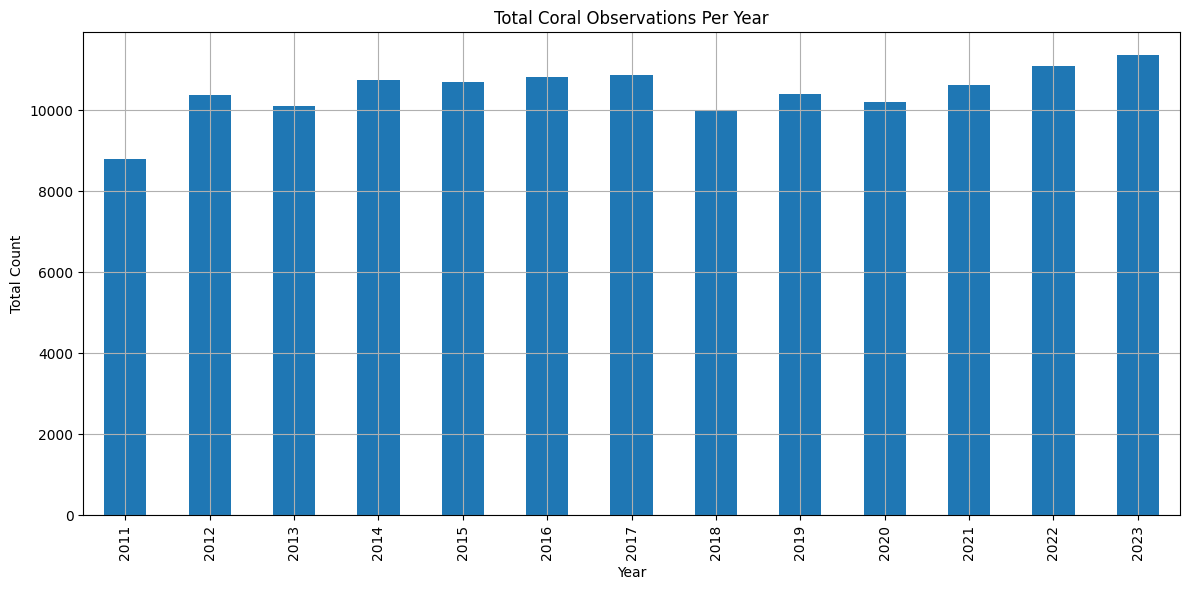

In [25]:
# Total Coral Counts per Year

# Sum all species per year
yearly_totals = data.groupby('Year')[species_cols].sum().sum(axis=1)
yearly_totals.plot(kind='bar', figsize=(12, 6))
plt.title("Total Coral Observations Per Year")
plt.ylabel("Total Count")
plt.xlabel("Year")
plt.grid(True)
plt.tight_layout()
plt.show()

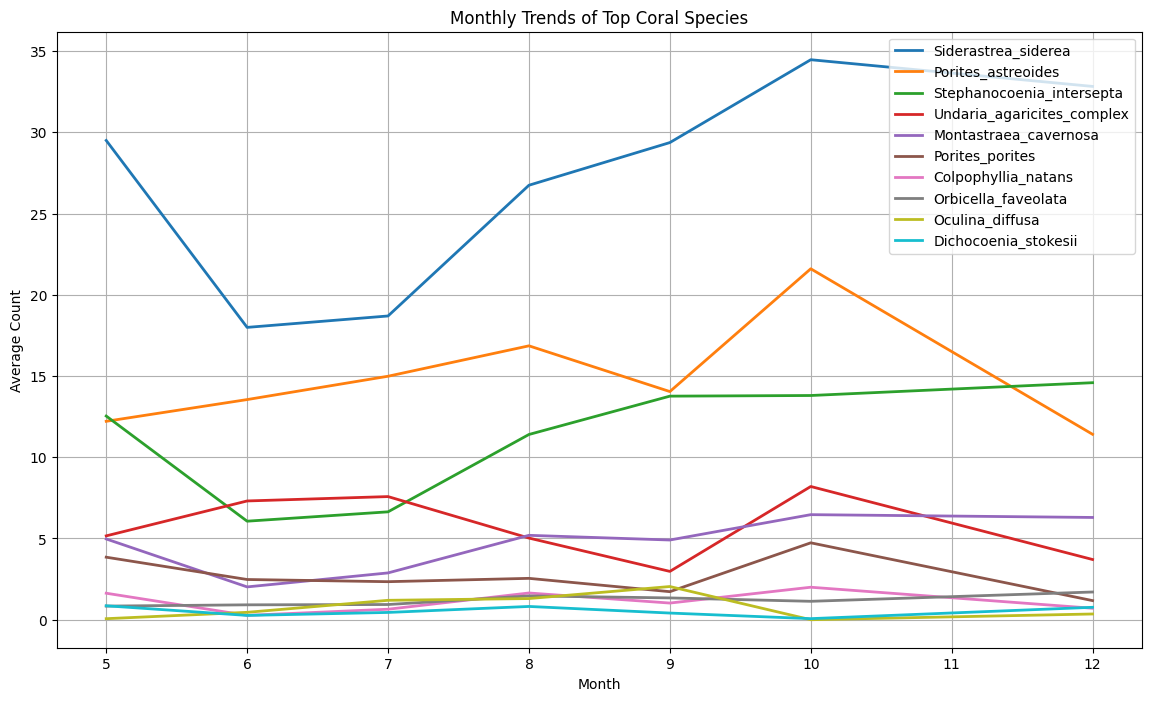

In [27]:
# Monthly or Seasonal Changes

# Extract month from 'Date'
data['Month'] = data['Date'].dt.month

# Monthly trend for top 5 most abundant species
monthly_species = data.groupby('Month')[top_species].mean()
monthly_species.plot(figsize=(14, 8), linewidth=2)
plt.title("Monthly Trends of Top Coral Species")
plt.xlabel("Month")
plt.ylabel("Average Count")
plt.grid(True)
plt.show()

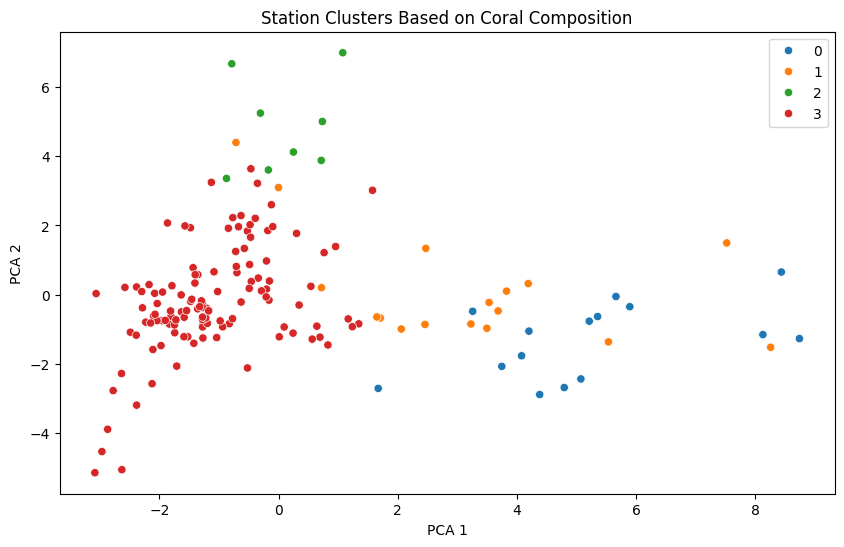

In [29]:
# Clustering of Stations/Sites Based on Coral Composition

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Aggregate coral counts per station
station_species = data.groupby('StationID')[species_cols].sum()

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(station_species)

# Dimensionality reduction (for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Cluster
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster and plot
station_species['Cluster'] = clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette="tab10")
plt.title("Station Clusters Based on Coral Composition")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

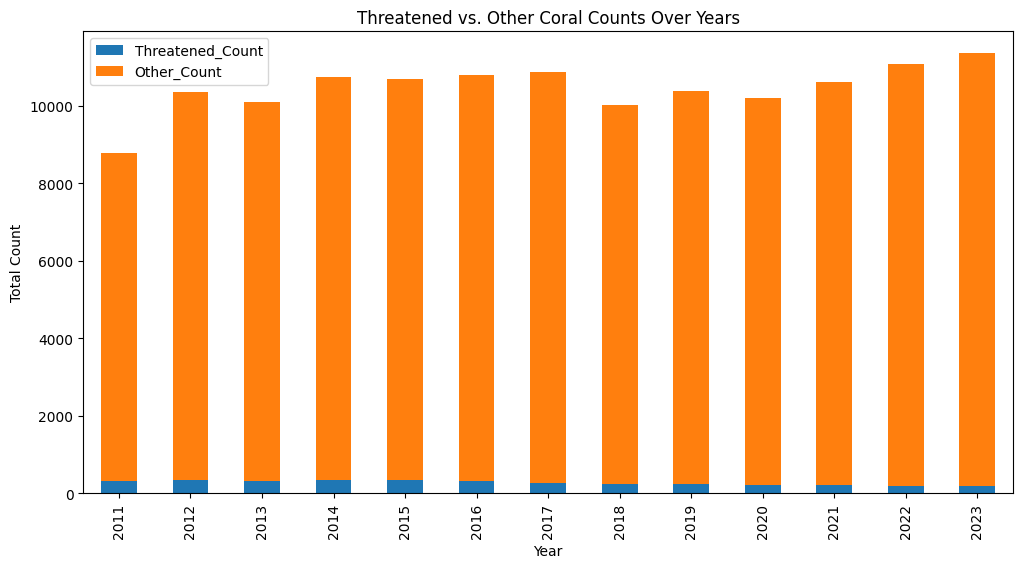

In [31]:
# Compare Healthy vs Threatened Species

# Example: (You can expand this with more accurate classifications)
threatened_species = [
    'Acropora_cervicornis',
    'Acropora_palmata',
    'Dendrogyra_cylindrus',
    'Orbicella_faveolata',
    'Orbicella_franksi',
    'Orbicella_annularis_complex'
]

# Tag threatened species
data['Threatened_Count'] = data[threatened_species].sum(axis=1)
data['Other_Count'] = data[[col for col in species_cols if col not in threatened_species]].sum(axis=1)

# Group yearly
threat_vs_other = data.groupby('Year')[['Threatened_Count', 'Other_Count']].sum()
threat_vs_other.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Threatened vs. Other Coral Counts Over Years")
plt.ylabel("Total Count")
plt.xlabel("Year")
plt.show()

In [33]:
# Species conservation status according to NOAA or IUCN (some sample species, you can extend this with more)
species_conservation_status = {
    'Acropora_cervicornis': 'Threatened',  # Acropora cervicornis is listed as threatened (NOAA)
    'Acropora_palmata': 'Endangered',  # Acropora palmata is endangered (NOAA)
    'Acropora_prolifera': 'Least Concern',  # Acropora prolifera is of least concern (IUCN)
    'Agaricia_fragilis': 'Least Concern',  # Agaricia fragilis is of least concern (IUCN)
    'Dendrogyra_cylindrus': 'Endangered',  # Dendrogyra cylindrus is endangered (NOAA)
    'Orbicella_faveolata': 'Endangered',  # Orbicella faveolata is endangered (NOAA)
    'Orbicella_franksi': 'Critically Endangered',  # Orbicella franksi is critically endangered (NOAA)
    'Pseudodiploria_strigosa': 'Least Concern',  # Pseudodiploria strigosa is of least concern (IUCN)
    'Millepora_complanata': 'Least Concern',  # Millepora complanata is of least concern (IUCN)
    'Siderastrea_radians': 'Least Concern',  # Siderastrea radians is of least concern (IUCN)
    'Siderastrea_siderea': 'Least Concern',  # Siderastrea siderea is of least concern (IUCN)
    'Solenastrea_bournoni': 'Least Concern',  # Solenastrea bournoni is of least concern (IUCN)
    'Stephanocoenia_intersepta': 'Least Concern',  # Stephanocoenia intersepta is of least concern (IUCN)
    'Favia_fragum': 'Least Concern',  # Favia fragum is of least concern (IUCN)
    'Montastraea_cavernosa': 'Endangered'  # Montastraea cavernosa is endangered (NOAA)
}

# Define a function to categorize species as threatened or not
def categorize_threatened_species(row):
    threatened_species = row.index.isin(species_conservation_status.keys()) & \
        row.index.to_series().map(species_conservation_status).isin(['Threatened', 'Endangered', 'Critically Endangered'])
    
    # Calculate counts for threatened species
    threatened_count = row[threatened_species].sum()
    return threatened_count

In [35]:
# Apply the categorization function to the dataset to calculate threatened species count
data['Threatened_Count'] = data[species_conservation_status.keys()].apply(categorize_threatened_species, axis=1)

# If you want a count of other species (non-threatened)
data['Other_Count'] = data[species_cols].sum(axis=1) - data['Threatened_Count']

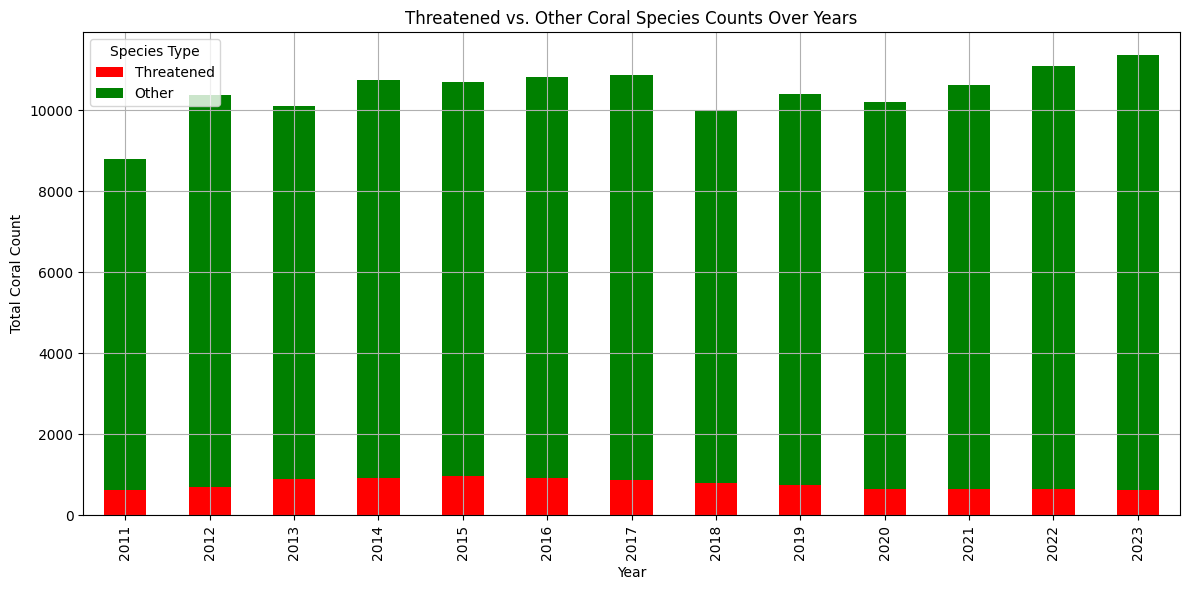

In [37]:
# Group by Year and sum threatened vs other counts
threat_vs_other = data.groupby('Year')[['Threatened_Count', 'Other_Count']].sum()

# Plot comparison of threatened vs other species counts over the years
threat_vs_other.plot(kind='bar', stacked=True, figsize=(12, 6), color=['red', 'green'])
plt.title("Threatened vs. Other Coral Species Counts Over Years")
plt.ylabel("Total Coral Count")
plt.xlabel("Year")
plt.legend(title="Species Type", labels=['Threatened', 'Other'])
plt.grid(True)
plt.tight_layout()
plt.show()